Evaluation identity_hate
Accuracy: 0.9905247995991984


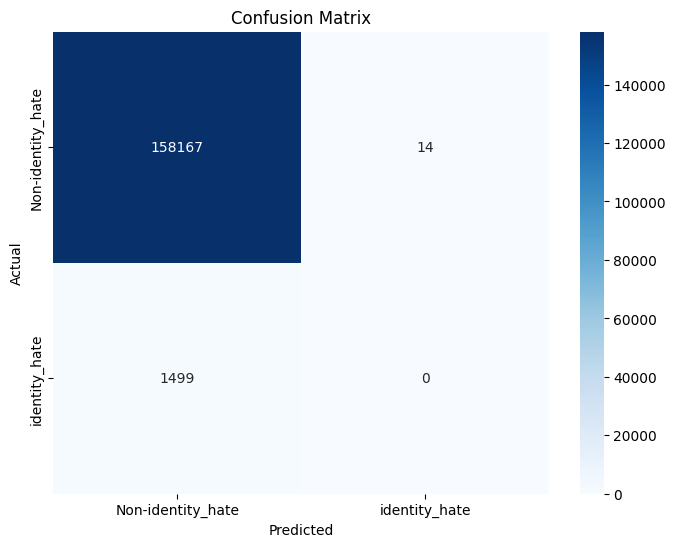


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    158181
           1       0.00      0.00      0.00      1499

    accuracy                           0.99    159680
   macro avg       0.50      0.50      0.50    159680
weighted avg       0.98      0.99      0.99    159680



In [7]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import re


def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

df = pd.read_csv("dataset/train.csv")

# # EDA
# df.info()
# print(df.describe())

# # Splitting Dataset
# label_toxic = df['toxic']
# print(label_toxic)


# df['label'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0 ).astype(int)
# df = df[['comment_text', 'toxic', 'severe_toxic', 'obscene ', 'threat', 'insult', 'identity_hate']].rename(columns={'comment_text': 'text'})


vec = TfidfVectorizer()
X = vec.fit_transform(df['comment_text'])

toxic = MultinomialNB()
toxic.fit(X, df['toxic'])

severe_toxic = MultinomialNB()
severe_toxic.fit(X, df['severe_toxic'])

obscene = MultinomialNB()
obscene.fit(X, df['obscene'])

threat = MultinomialNB()
threat.fit(X, df['threat'])

insult = MultinomialNB()
insult.fit(X, df['insult'])

identity_hate = MultinomialNB()
identity_hate.fit(X, df['identity_hate'])


def predict_toxic(text):
    value = vec.transform([clean_text(text)])
    res = toxic.predict_proba(value[0])
    return res[:, 1][0]

def predict_severe_toxic(text):
    value = vec.transform([clean_text(text)])
    res = severe_toxic.predict_proba(value[0])
    return res[:, 1][0]

def predict_obscene(text):
    value = vec.transform([clean_text(text)])
    res = obscene.predict_proba(value[0])
    return res[:, 1][0]

def predict_threat(text):
    value = vec.transform([clean_text(text)])
    res = threat.predict_proba(value[0])
    return res[:, 1][0]

def predict_insult(text):
    value = vec.transform([clean_text(text)])
    res = insult.predict_proba(value[0])
    return res[:, 1][0]

def predict_identity_hate(text):
    value = vec.transform([clean_text(text)])
    res = identity_hate.predict_proba(value[0])
    return res[:, 1][0]

# Validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# fungsi evaluation label toxic
def evaluation_toxic():
    # Melakukan cross-validation dan mendapatkan prediksi
    y_pred = cross_val_predict(toxic, X, df['toxic'], cv=5)

    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(df['toxic'], y_pred)
    conf_matrix = confusion_matrix(df['toxic'], y_pred)
    class_report = classification_report(df['toxic'], y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation Toxic")
    print("=============================")
    print("Accuracy:", accuracy)
    # Menampilkan Confusion Matrix dengan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(class_report)

evaluation_toxic()

# fungsi evaluation label severe toxic
def evaluation_severe_toxic():
    # Melakukan cross-validation dan mendapatkan prediksi
    y_pred = cross_val_predict(severe_toxic, X, df['severe_toxic'], cv=5)

    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(df['severe_toxic'], y_pred)
    conf_matrix = confusion_matrix(df['severe_toxic'], y_pred)
    class_report = classification_report(df['severe_toxic'], y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation Severe Toxic")
    print("=============================")
    print("Accuracy:", accuracy)
    # Menampilkan Confusion Matrix dengan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Severe Toxic', 'Severe Toxic'], yticklabels=['Non-Severe Toxic', 'Severe Toxic'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(class_report)

evaluation_severe_toxic()

# fungsi evaluation label obscene
def evaluation_obscene():
    # Melakukan cross-validation dan mendapatkan prediksi
    y_pred = cross_val_predict(obscene, X, df['obscene'], cv=5)

    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(df['obscene'], y_pred)
    conf_matrix = confusion_matrix(df['obscene'], y_pred)
    class_report = classification_report(df['obscene'], y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation Obscene")
    print("=============================")
    print("Accuracy:", accuracy)
    # Menampilkan Confusion Matrix dengan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Obscene', 'Obscene'], yticklabels=['Non-Obscene', 'Obscene'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(class_report)

evaluation_obscene()
    

# fungsi evaluation label threat
def evaluation_threat():
    # Melakukan cross-validation dan mendapatkan prediksi
    y_pred = cross_val_predict(threat, X, df['threat'], cv=5)

    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(df['threat'], y_pred)
    conf_matrix = confusion_matrix(df['threat'], y_pred)
    class_report = classification_report(df['threat'], y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation threat")
    print("=============================")
    print("Accuracy:", accuracy)
    # Menampilkan Confusion Matrix dengan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-threat', 'threat'], yticklabels=['Non-threat', 'threat'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(class_report)

evaluation_threat()

# fungsi evaluation label insult
def evaluation_insult():
    # Melakukan cross-validation dan mendapatkan prediksi
    y_pred = cross_val_predict(insult, X, df['insult'], cv=5)

    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(df['insult'], y_pred)
    conf_matrix = confusion_matrix(df['insult'], y_pred)
    class_report = classification_report(df['insult'], y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation insult")
    print("=============================")
    print("Accuracy:", accuracy)
    # Menampilkan Confusion Matrix dengan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-insult', 'insult'], yticklabels=['Non-insult', 'insult'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(class_report)

evaluation_insult()

# fungsi evaluation label identity hate
def evaluation_identity_hate():
    # Melakukan cross-validation dan mendapatkan prediksi
    y_pred = cross_val_predict(identity_hate, X, df['identity_hate'], cv=5)

    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(df['identity_hate'], y_pred)
    conf_matrix = confusion_matrix(df['identity_hate'], y_pred)
    class_report = classification_report(df['identity_hate'], y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation identity_hate")
    print("=============================")
    print("Accuracy:", accuracy)
    # Menampilkan Confusion Matrix dengan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-identity_hate', 'identity_hate'], yticklabels=['Non-identity_hate', 'identity_hate'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(class_report)

evaluation_identity_hate()


# print("your text: ", text)
# print("")
# print("Toxic: ", predict_toxic(text))
# print("Severe Toxic: ", predict_severe_toxic(text))
# print("Obscene: ", predict_obscene(text))
# print("Threat: ", predict_threat(text))
# print("Insult: ", predict_insult(text))
# print("Identity Hate: ", predict_identity_hate(text))